In [1]:
# Create Features
def pe_detected(row):
    return np.sum(row.to_numpy())

def nr_active_slices(row):
    return np.nonzero(row.to_numpy())[0].shape[0]

def mean_npe(row):
    return np.mean(row.to_numpy())

def mean_npe_active(row):
    rownp = row.to_numpy()
    rownonzero = np.nonzero(rownp)[0]
    return np.mean(rownp[rownonzero]) if rownonzero.shape[0]>0 else -1

def std_npe(row):
    return np.std(row.to_numpy())

def std_npe_active(row):
    rownp = row.to_numpy()
    rownonzero = np.nonzero(rownp)[0]
    return np.std(rownp[rownonzero]) if rownonzero.shape[0]>0 else -1

def range_detections(row):
    rownp = row.to_numpy()
    rownonzero = np.nonzero(rownp)[0]
    return rownonzero[-1] - rownonzero[0] + 1 if rownonzero.shape[0]>0 else -1

def spatial_var(row):
    rownp = row.to_numpy()
    ids = np.repeat(np.argwhere(rownp>0), rownp[rownp>0])
    return np.var(ids) if ids.shape[0]>0 else -1

def spatial_std(row):
    rownp = row.to_numpy()
    ids = np.repeat(np.argwhere(rownp>0), rownp[rownp>0])
    return np.std(ids) if ids.shape[0]>0 else -1

In [2]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [3]:
def load_dataframe_from_files(dirin, fileprefix, max_files=100):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

# load all data

In [4]:
# Load Ar39
init = time.time()
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Ar39_08_18_2020", "Ar39_Snapshots")

fileprefix = "Snapshot1Ar39*"
dfall1ar39 = load_dataframe_from_files(dirin, fileprefix)

fileprefix = "Snapshot2Ar39*"
dfall2ar39 = load_dataframe_from_files(dirin, fileprefix)

fileprefix = "Snapshot3Ar39*"
dfall3ar39 = load_dataframe_from_files(dirin, fileprefix)

fileprefix = "Snapshot4Ar39*"
dfall4ar39 = load_dataframe_from_files(dirin, fileprefix)

print("[Info] Loaded all 1, 2, 3, 4 Ar39 Pileups in {:.2f} seconds".format(time.time() - init))

# Load Muons
init = time.time()
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Muons_08_18_2020", "Muons_Snapshots")

fileprefix = "SnapshotMuons*"
dfallmu = load_dataframe_from_files(dirin, fileprefix)
print("[Info] Loaded all Muons in {:.2f} seconds".format(time.time() - init))

[Info] Loading 100 files wt prefix:
Snapshot1Ar39*
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot2Ar39*
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot3Ar39*
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot4Ar39*
...................................................................................................
[Info] Loaded all 1, 2, 3, 4 Ar39 Pileups in 146.15 seconds
[Info] Loading 100 files wt prefix:
SnapshotMuons*
...................................................................................................
[Info] Loaded all Muons in 2.09 seconds


# preliminary cut on Nr Outer Slices

In [5]:
def nr_active_slices(row):
    return np.nonzero(row.to_numpy())[0].shape[0]
n_inner_slices, n_outer_slices = 12, 20
dfall1ar39["NActiveSlices_outer"] = dfall1ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
dfall2ar39["NActiveSlices_outer"] = dfall2ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
dfall3ar39["NActiveSlices_outer"] = dfall3ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
dfall4ar39["NActiveSlices_outer"] = dfall4ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
dfallmu["NActiveSlices_outer"] = dfallmu.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)

print("[Preliminary Cut on Nr Active Slices of outer shroud]")
cut_out_nas = 4
dfcut1ar39 = dfall1ar39[dfall1ar39.NActiveSlices_outer >= cut_out_nas]
dfcut2ar39 = dfall2ar39[dfall2ar39.NActiveSlices_outer >= cut_out_nas]
dfcut3ar39 = dfall3ar39[dfall3ar39.NActiveSlices_outer >= cut_out_nas]
dfcut4ar39 = dfall4ar39[dfall4ar39.NActiveSlices_outer >= cut_out_nas]
dfcutmu = dfallmu[dfallmu.NActiveSlices_outer >= cut_out_nas]

print("[Muons] Select >= {} Outer NAS: {} ({:.2f}%)".format(cut_out_nas, len(dfcutmu), len(dfcutmu)/len(dfallmu)*100))
print("[1Ar39] Select >= {} Outer NAS: {} ({:.2f}%)".format(cut_out_nas, len(dfcut1ar39), len(dfcut1ar39)/len(dfall1ar39)*100))
print("[2Ar39] Select >= {} Outer NAS: {} ({:.2f}%)".format(cut_out_nas, len(dfcut2ar39), len(dfcut2ar39)/len(dfall2ar39)*100))
print("[3Ar39] Select >= {} Outer NAS: {} ({:.2f}%)".format(cut_out_nas, len(dfcut3ar39), len(dfcut3ar39)/len(dfall3ar39)*100))
print("[4Ar39] Select >= {} Outer NAS: {} ({:.2f}%)".format(cut_out_nas, len(dfcut4ar39), len(dfcut4ar39)/len(dfall4ar39)*100))

[Preliminary Cut on Nr Active Slices of outer shroud]
[Muons] Select >= 4 Outer NAS: 132050 (84.08%)
[1Ar39] Select >= 4 Outer NAS: 121738 (2.30%)
[2Ar39] Select >= 4 Outer NAS: 482387 (18.19%)
[3Ar39] Select >= 4 Outer NAS: 920580 (52.07%)
[4Ar39] Select >= 4 Outer NAS: 1097976 (82.81%)


# consideratin on requirements/goal

In [6]:
# starting rate vs goal rate
ar39_weights = np.array([.9903065, 
                         .0096307, 
                         .0000624,
                         .0000004])    # from normalized probabilities P[k decays | >=1 decays]
ar39_fprs = np.array([len(dfcut1ar39)/len(dfall1ar39), len(dfcut2ar39)/len(dfall2ar39),
                      len(dfcut3ar39)/len(dfall3ar39), len(dfcut4ar39)/len(dfall4ar39)])
mu_tpr = len(dfcutmu)/len(dfallmu)

print("[Info] Starting TPR: {:.7f}".format(mu_tpr))
print("[Info] Starting FPR: {:.7f}".format((ar39_weights * ar39_fprs).sum()))
print("[Info] Starting Trigger Rate: {:.0f}".format((ar39_weights * ar39_fprs).sum() * 1945))
print()
print("The goal is to reduce the Trigger Rate <1 and keep TPR>.80")
print("[Info] Target TPR: {:.7f}".format(.80))
print("[Info] Target FPR: {:.7f}".format((ar39_weights * ar39_fprs).sum() / ((ar39_weights * ar39_fprs).sum() * 1945)))

[Info] Starting TPR: 0.8407776
[Info] Starting FPR: 0.0245165
[Info] Starting Trigger Rate: 48

The goal is to reduce the Trigger Rate <1 and keep TPR>.80
[Info] Target TPR: 0.8000000
[Info] Target FPR: 0.0005141


# consideration on dataset composition

In [7]:
max_pe_lowenergy = 50
tot=len(dfcutmu)
tot_lemu=len(dfcutmu[dfcutmu.pedetected<=max_pe_lowenergy])
print("[Info] Considering {} Muons wt >= {} Outer Active Slices".format(tot, cut_out_nas))
print("[Info] Select {} Muons wt <= {} PE Detected".format(tot_lemu, max_pe_lowenergy))
# parameters
#ww = (ar39_weights * ar39_fprs) / (ar39_weights * ar39_fprs).sum()
ww = [.75, .25*.75, .25*.25*.75, .25*.25*.25]
test = 1595    # to round the training data to 20K
# compute ar39 dataset size
print("[Muons Dataset]")
print("\tInstances Test Muons: {}".format(test))
print("\tInstances Training Muons: {}".format(tot_lemu-test))

print("[Ar39 Dataset]")
print("\tInstances Test Ar39: all the rest")
ar39_dataset_sizes = []
for i in range(4):
    current = (tot_lemu-test) * ww[i]
    print("\tInstances Training {} Ar39: {:.0f}".format(i+1, round(current)))
    ar39_dataset_sizes.append(round(current))

[Info] Considering 132050 Muons wt >= 4 Outer Active Slices
[Info] Select 21595 Muons wt <= 50 PE Detected
[Muons Dataset]
	Instances Test Muons: 1595
	Instances Training Muons: 20000
[Ar39 Dataset]
	Instances Test Ar39: all the rest
	Instances Training 1 Ar39: 15000
	Instances Training 2 Ar39: 3750
	Instances Training 3 Ar39: 938
	Instances Training 4 Ar39: 312


# remove test data

In [8]:
# Remove test data for later eval
n_test_mu, n_test_ar = test, 100000
# split mu data
dflemu = dfcutmu[dfcutmu.pedetected<=max_pe_lowenergy]
id_mu = np.arange(len(dflemu))
np.random.shuffle(id_mu)
test_muons, train_muons = dflemu.iloc[id_mu[:n_test_mu], :], dflemu.iloc[id_mu[n_test_mu:], :]

# split ar39 data
id_ar = np.arange(len(dfcut1ar39))
np.random.shuffle(id_ar)
test_1ar39, train_1ar39 = dfcut1ar39.iloc[id_ar[:n_test_ar], :], dfcut1ar39.iloc[id_ar[n_test_ar:], :]

id_ar = np.arange(len(dfcut2ar39))
np.random.shuffle(id_ar)
test_2ar39, train_2ar39 = dfcut2ar39.iloc[id_ar[:n_test_ar], :], dfcut2ar39.iloc[id_ar[n_test_ar:], :]

id_ar = np.arange(len(dfcut3ar39))
np.random.shuffle(id_ar)
test_3ar39, train_3ar39 = dfcut3ar39.iloc[id_ar[:n_test_ar], :], dfcut3ar39.iloc[id_ar[n_test_ar:], :]

id_ar = np.arange(len(dfcut4ar39))
np.random.shuffle(id_ar)
test_4ar39, train_4ar39 = dfcut4ar39.iloc[id_ar[:n_test_ar], :], dfcut4ar39.iloc[id_ar[n_test_ar:], :]

print("[Info] Muon Train:\t{},\tTest {}".format(len(train_muons), len(test_muons)))
print("[Info] 1 Ar39 Train:\t{},\tTest {}".format(len(train_1ar39), len(test_1ar39)))
print("[Info] 2 Ar39 Train:\t{},\tTest {}".format(len(train_2ar39), len(test_2ar39)))
print("[Info] 3 Ar39 Train:\t{},\tTest {}".format(len(train_3ar39), len(test_3ar39)))
print("[Info] 4 Ar39 Train:\t{},\tTest {}".format(len(train_4ar39), len(test_4ar39)))

test_1ar39["group"] = 1
test_2ar39["group"] = 2
test_3ar39["group"] = 3
test_4ar39["group"] = 4
test_ar39 = pd.concat([test_1ar39, test_2ar39, test_3ar39, test_4ar39], axis=0)

[Info] Muon Train:	20000,	Test 1595
[Info] 1 Ar39 Train:	21738,	Test 100000
[Info] 2 Ar39 Train:	382387,	Test 100000
[Info] 3 Ar39 Train:	820580,	Test 100000
[Info] 4 Ar39 Train:	997976,	Test 100000


/home/luigi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/luigi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/luigi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

# undersample ar39

In [9]:
def undersample_argon(ar39_df, number_of_instances=1000, augment_from_pe=35, augmentation_nr=5,
                      skip_first_cols=2, nslices=72):
    bins = np.linspace(0, ar39_df.pedetected.max()+1, ar39_df.pedetected.max()+2)
    bin_cont, bin_edges, _ = plt.hist(ar39_df.pedetected, bins=bins, density=True, label="Ar39", edgecolor='w')
    # compute the nr of samples for each PE value,
    # to undersample ar39 keeping the same distribution
    avail_instances_per_pe = np.array([len(ar39_df[ar39_df.pedetected==pe]) for pe in range(0, ar39_df.pedetected.max()+1)])
    nr_ar_samples_per_pe = np.array(np.where(np.ceil(bin_cont*number_of_instances)<=avail_instances_per_pe, np.ceil(bin_cont*number_of_instances), number_of_instances), dtype=int)
    # Introduce a small bias on instances with "high" PE value
    # to avoid to have just a few samples (e.g. 30,40,50,60 PE)
    scaled_ar39 = pd.DataFrame()
    for pe in range(1, ar39_df.pedetected.max()+1):
        if pe > augment_from_pe:
            nr_instances = augmentation_nr
        else:
            nr_instances = nr_ar_samples_per_pe[pe]
        scaled_ar39 = pd.concat([scaled_ar39, ar39_df[ar39_df.pedetected==pe].iloc[:nr_instances]])
    AA = scaled_ar39.iloc[:, skip_first_cols:skip_first_cols+nslices].to_numpy()
    np.random.shuffle(AA)    # to avoid order by PE
    return pd.DataFrame(AA)

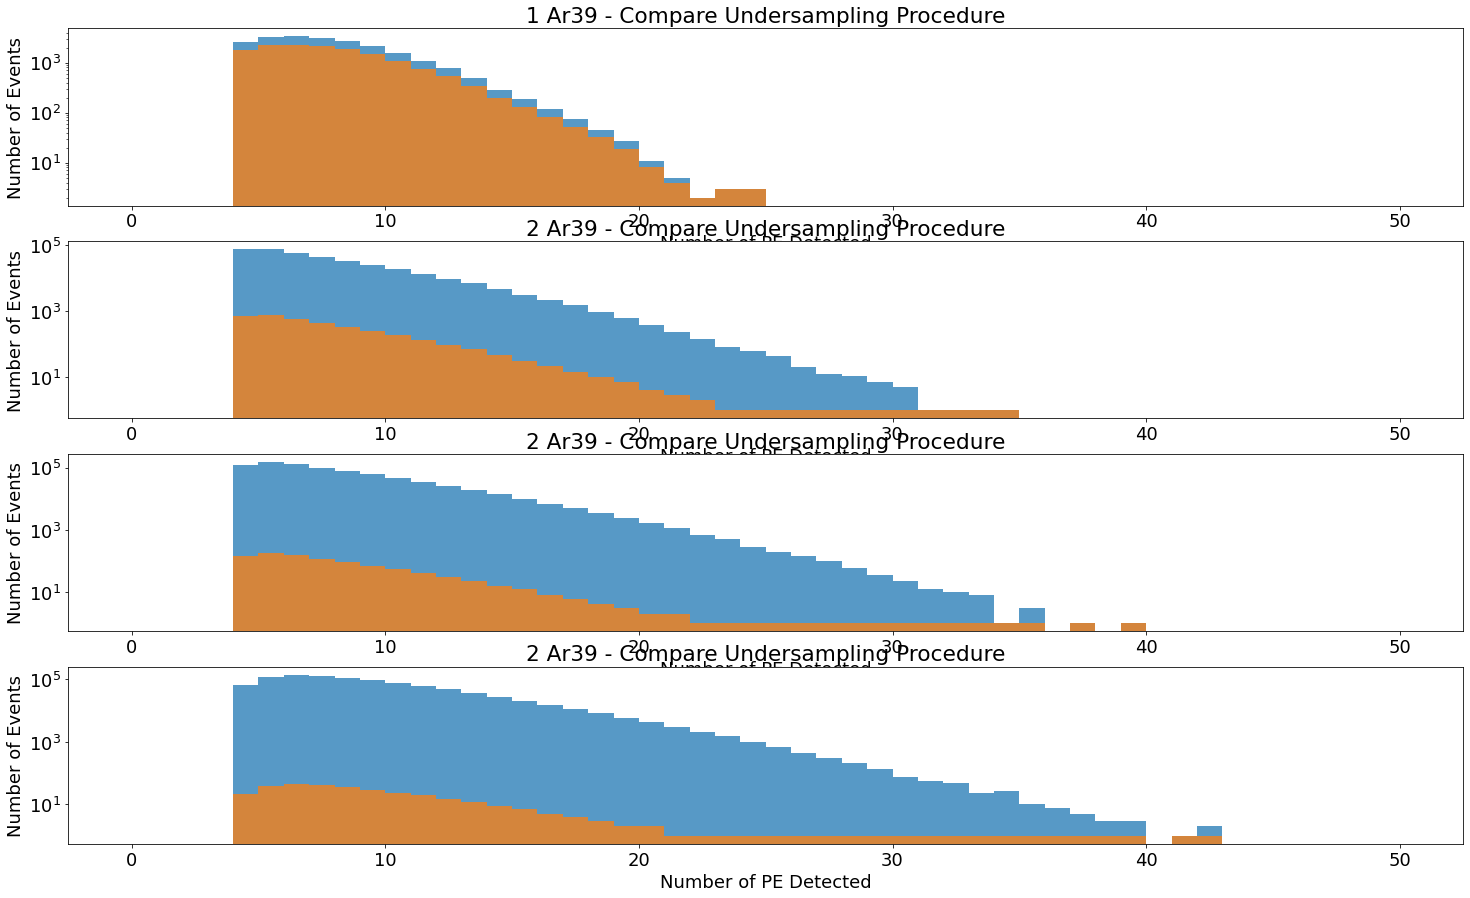

[Info] Undersample 1 Ar39: 15012 instances
[Info] Undersample 2 Ar39: 3769 instances
[Info] Undersample 3 Ar39: 959 instances
[Info] Undersample 4 Ar39: 337 instances
[Info] Total Ar39 Training data: 20077 instances


In [10]:
skip_first_cols, n_inner_slices, n_outer_slices = 3, 12, 20

sampled_1ar39 = undersample_argon(train_1ar39, ar39_dataset_sizes[0], augment_from_pe=50, augmentation_nr=10, skip_first_cols=skip_first_cols, nslices=n_inner_slices+n_outer_slices)
sampled_2ar39 = undersample_argon(train_2ar39, ar39_dataset_sizes[1], augment_from_pe=50, augmentation_nr=10, skip_first_cols=skip_first_cols, nslices=n_inner_slices+n_outer_slices)
sampled_3ar39 = undersample_argon(train_3ar39, ar39_dataset_sizes[2], augment_from_pe=50, augmentation_nr=10, skip_first_cols=skip_first_cols, nslices=n_inner_slices+n_outer_slices)
sampled_4ar39 = undersample_argon(train_4ar39, ar39_dataset_sizes[3], augment_from_pe=50, augmentation_nr=10, skip_first_cols=skip_first_cols, nslices=n_inner_slices+n_outer_slices)

plt.cla()
bins = np.linspace(0, 50, 51)
alpha = 0.75

plt.subplot(4, 1, 1)
plt.title("1 Ar39 - Compare Undersampling Procedure")
plt.xlabel("Number of PE Detected")
plt.ylabel("Number of Events")
plt.hist(train_1ar39.pedetected, bins=bins, label="Whole Training Data", density=False, alpha=alpha)
plt.hist(sampled_1ar39.sum(axis=1), bins=np.linspace(0, 50, 51), label="Undersampled Data", density=False, alpha=alpha)
plt.yscale("log")

plt.subplot(4, 1, 2)
plt.title("2 Ar39 - Compare Undersampling Procedure")
plt.xlabel("Number of PE Detected")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.hist(train_2ar39.pedetected, bins=bins, label="Whole Training Data", density=False, alpha=alpha)
plt.hist(sampled_2ar39.sum(axis=1), bins=bins, label="Undersampled Data", density=False, alpha=alpha)

plt.subplot(4, 1, 3)
plt.title("2 Ar39 - Compare Undersampling Procedure")
plt.xlabel("Number of PE Detected")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.hist(train_3ar39.pedetected, bins=bins, label="Whole Training Data", density=False, alpha=alpha)
plt.hist(sampled_3ar39.sum(axis=1), bins=bins, label="Undersampled Data", density=False, alpha=alpha)

plt.subplot(4, 1, 4)
plt.title("2 Ar39 - Compare Undersampling Procedure")
plt.xlabel("Number of PE Detected")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.hist(train_4ar39.pedetected, bins=bins, label="Whole Training Data", density=False, alpha=alpha)
plt.hist(sampled_4ar39.sum(axis=1), bins=bins, label="Undersampled Data", density=False, alpha=alpha)

plt.show()

train_14ar39 = pd.concat([sampled_1ar39, sampled_2ar39, sampled_3ar39, sampled_4ar39], axis=0)
print("[Info] Undersample 1 Ar39: {} instances".format(sampled_1ar39.shape[0]))
print("[Info] Undersample 2 Ar39: {} instances".format(sampled_2ar39.shape[0]))
print("[Info] Undersample 3 Ar39: {} instances".format(sampled_3ar39.shape[0]))
print("[Info] Undersample 4 Ar39: {} instances".format(sampled_4ar39.shape[0]))
print("[Info] Total Ar39 Training data: {} instances".format(train_14ar39.shape[0]))

# compute features on training data

In [11]:
# Compute features muon
import time

init = time.time()
df_mu_feat = pd.DataFrame()
df_mu_feat["PEDetected_inner"] = train_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
df_mu_feat["NActiveSlices_inner"] = train_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: nr_active_slices(row), axis=1)
df_mu_feat["MeanNPEActive_inner"] = train_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: mean_npe_active(row), axis=1)
df_mu_feat["StdNPEActive_inner"] = train_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: std_npe_active(row), axis=1)
df_mu_feat["SpatialRange_inner"] = train_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: range_detections(row), axis=1)
df_mu_feat["SpatialVar_inner"] = train_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_var(row), axis=1)
df_mu_feat["SpatialStd_inner"] = train_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Mu Inner features: {:.3f} sec".format(time.time() - init))
init = time.time()
df_mu_feat["PEDetected_outer"] = train_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
df_mu_feat["NActiveSlices_outer"] = train_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
df_mu_feat["MeanNPEActive_outer"] = train_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: mean_npe_active(row), axis=1)
df_mu_feat["StdNPEActive_outer"] = train_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: std_npe_active(row), axis=1)
df_mu_feat["SpatialRange_outer"] = train_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: range_detections(row), axis=1)
df_mu_feat["SpatialVar_outer"] = train_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_var(row), axis=1)
df_mu_feat["SpatialStd_outer"] = train_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Mu Outer features: {:.3f} sec".format(time.time() - init))
init = time.time()
df_mu_feat["PEDetected_tot"] = df_mu_feat["PEDetected_inner"] + df_mu_feat["PEDetected_outer"]
df_mu_feat["NActiveSlices_tot"] = df_mu_feat["NActiveSlices_inner"] + df_mu_feat["NActiveSlices_outer"]
df_mu_feat["MeanNPEActive_tot"] = df_mu_feat["PEDetected_tot"] / df_mu_feat["NActiveSlices_tot"]
df_mu_feat = df_mu_feat.fillna(-1)
print("Compute combined features: {:.3f} sec".format(time.time() - init))

init = time.time()
df_ar39_feat = pd.DataFrame()
df_ar39_feat["PEDetected_inner"] = train_14ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
df_ar39_feat["NActiveSlices_inner"] = train_14ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: nr_active_slices(row), axis=1)
df_ar39_feat["MeanNPEActive_inner"] = train_14ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: mean_npe_active(row), axis=1)
df_ar39_feat["StdNPEActive_inner"] = train_14ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: std_npe_active(row), axis=1)
df_ar39_feat["SpatialRange_inner"] = train_14ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: range_detections(row), axis=1)
df_ar39_feat["SpatialVar_inner"] = train_14ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_var(row), axis=1)
df_ar39_feat["SpatialStd_inner"] = train_14ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Ar39 Inner features: {:.3f} sec".format(time.time() - init))
init = time.time()
df_ar39_feat["PEDetected_outer"] = train_14ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
df_ar39_feat["NActiveSlices_outer"] = train_14ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
df_ar39_feat["MeanNPEActive_outer"] = train_14ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: mean_npe_active(row), axis=1)
df_ar39_feat["StdNPEActive_outer"] = train_14ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: std_npe_active(row), axis=1)
df_ar39_feat["SpatialRange_outer"] = train_14ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: range_detections(row), axis=1)
df_ar39_feat["SpatialVar_outer"] = train_14ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_var(row), axis=1)
df_ar39_feat["SpatialStd_outer"] = train_14ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Ar39 Outer features: {:.3f} sec".format(time.time() - init))
init = time.time()
df_ar39_feat["PEDetected_tot"] = df_ar39_feat["PEDetected_inner"] + df_ar39_feat["PEDetected_outer"]
df_ar39_feat["NActiveSlices_tot"] = df_ar39_feat["NActiveSlices_inner"] + df_ar39_feat["NActiveSlices_outer"]
df_ar39_feat["MeanNPEActive_tot"] = df_ar39_feat["PEDetected_tot"] / df_ar39_feat["NActiveSlices_tot"]
df_ar39_feat = df_ar39_feat.fillna(-1)
print("Compute combined features: {:.3f} sec".format(time.time() - init))

Compute Mu Inner features: 2.379 sec
Compute Mu Outer features: 3.724 sec
Compute combined features: 0.007 sec
Compute Ar39 Inner features: 3.242 sec
Compute Ar39 Outer features: 3.734 sec
Compute combined features: 0.005 sec


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix as cv
import time

init = time.time()

# Prepare data for training
df_mu_feat["y"] = 1
df_ar39_feat["y"] = 0
data = pd.concat([df_mu_feat, df_ar39_feat], axis=0)
X, y = data.iloc[:, :-1], data.iloc[:, -1]
X = np.array(X)
y = np.array(y)

score = "accuracy"
print("[Info] Tune criterion")
parameters = {'criterion': ['gini', 'entropy']}        

# Conduct Parameter Optmization With Pipeline
# Create a grid search object
clf = GridSearchCV(DecisionTreeClassifier(max_depth=4, min_samples_leaf=1), 
                   param_grid = parameters, 
                   scoring=score, n_jobs=2, cv=5)

# Fit the grid search
clf.fit(X, y)
best_criterion = clf.best_params_["criterion"]
print("Best Criterion: {} => Score: {}".format(best_criterion, clf.best_score_))


print("\n[Info] Tune Depth, Min Samples leaf")
parameters = {'min_samples_leaf': [300, 400, 500, 600, 700, 800, 900, 1000]}    

# Conduct Parameter Optmization With Pipeline
# Create a grid search object
clf = GridSearchCV(DecisionTreeClassifier(criterion=best_criterion, max_depth=4), 
                   param_grid = parameters, 
                   scoring=score, n_jobs=2, cv=5)
# Fit the grid search
clf.fit(X, y)
best_minleaf = clf.best_params_["min_samples_leaf"]
print("Best Min Samples Leaf: {} => Score: {}".format(best_minleaf, clf.best_score_))

parameters = {'max_depth': [2, 3, 4]}
clf = GridSearchCV(DecisionTreeClassifier(criterion=best_criterion, min_samples_leaf=best_minleaf), 
                   param_grid = parameters, 
                   scoring=score, n_jobs=2, cv=5)
# Fit the grid search
clf.fit(X, y)
best_max_depth = clf.best_params_["max_depth"]
print("Best Max Depth: {} => Score: {}".format(best_max_depth, clf.best_score_))

print("\n[Info] Best Model Evaluation")
# Use Cross Validation To Evaluate Final Model
print("[Model] Criterion: {}, Max Depth: {}, Min Samples Leaf: {}".format(best_criterion,
                                                                         best_max_depth,
                                                                         best_minleaf))
final_clf = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth,
                            min_samples_leaf=best_minleaf)
#final_clf.fit(X, y)
CV_Result = cross_val_score(final_clf, X, y, cv=5, scoring=score)
print("[Results]\n\t5-Fold X-Validation: {}".format(CV_Result))
print("\tMean Score: {:.4f}, Std Dev: {:.4f}".format(CV_Result.mean(), CV_Result.std()))

print("[Time] Elapsed time {}".format(time.time() - init))

[Info] Tune criterion
Best Criterion: gini => Score: 0.9119938289360144

[Info] Tune Depth, Min Samples leaf
Best Min Samples Leaf: 400 => Score: 0.9018882353820121
Best Max Depth: 4 => Score: 0.9018882353820121

[Info] Best Model Evaluation
[Model] Criterion: gini, Max Depth: 4, Min Samples Leaf: 400
[Results]
	5-Fold X-Validation: [0.91442116 0.91454591 0.91478478 0.89819089 0.86749844]
	Mean Score: 0.9019, Std Dev: 0.0183
[Time] Elapsed time 4.096166133880615


Feature: MeanNPEActive_inner =>	Score: 0.00539
Feature: SpatialVar_inner =>	Score: 0.04925
Feature: SpatialStd_inner =>	Score: 0.17411
Feature: PEDetected_outer =>	Score: 0.73940
Feature: StdNPEActive_outer =>	Score: 0.00334
Feature: SpatialRange_outer =>	Score: 0.02404
Feature: NActiveSlices_tot =>	Score: 0.00422
Feature: MeanNPEActive_tot =>	Score: 0.00026


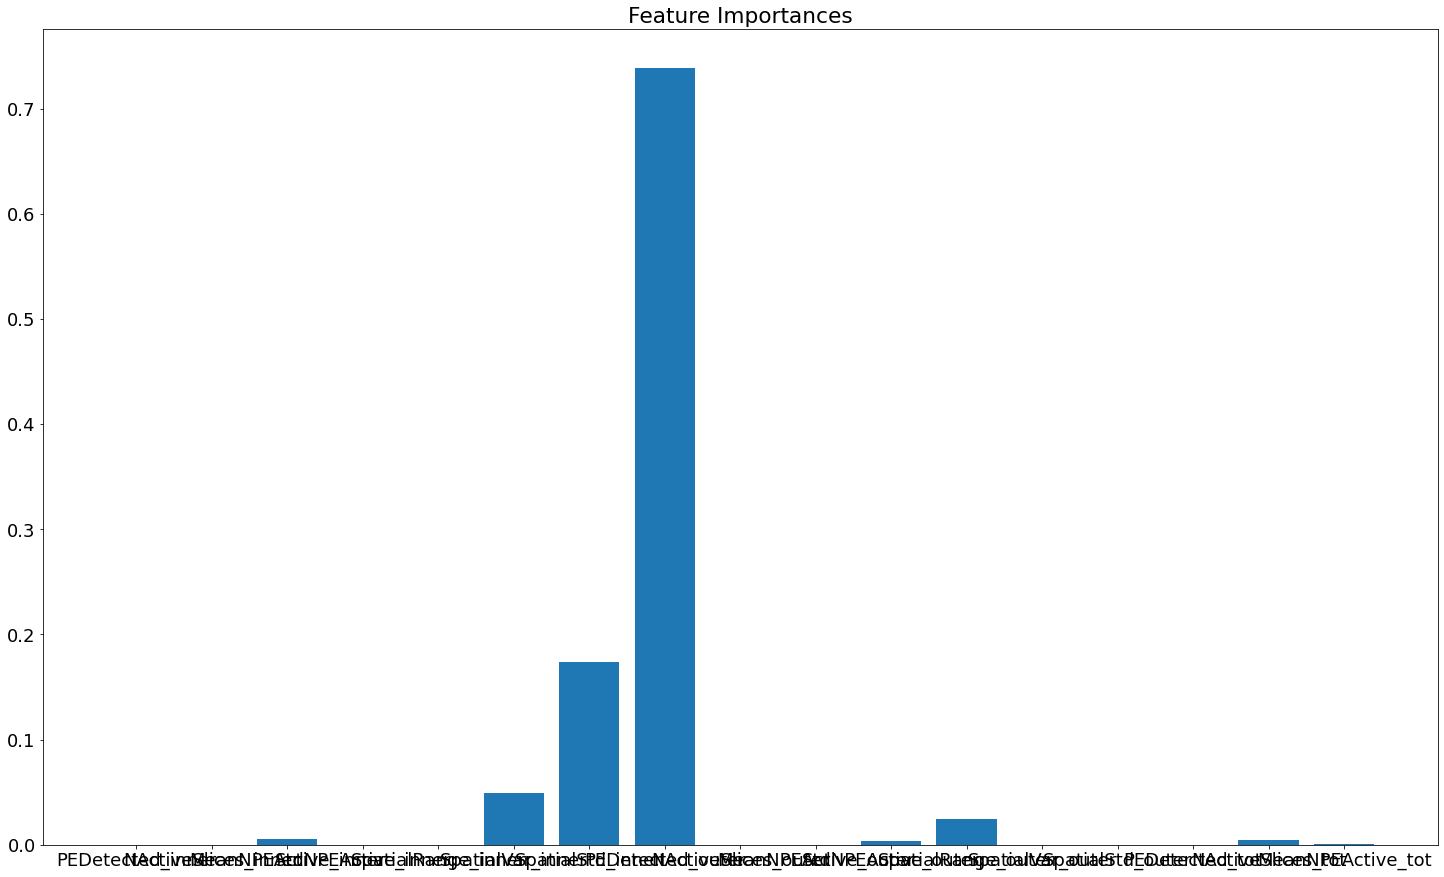

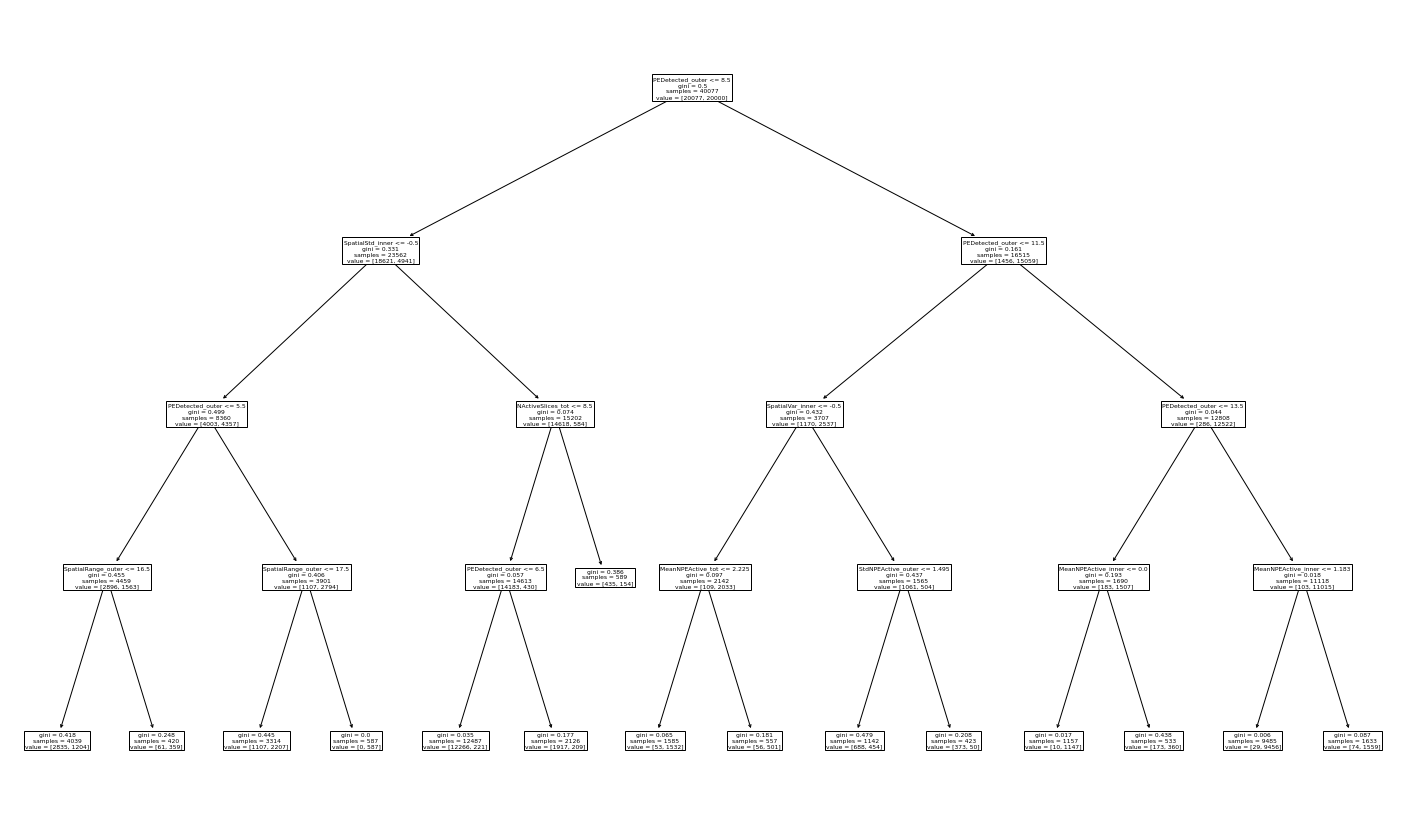

In [13]:
from sklearn import tree
# Train final model
final_clf = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth,
                            min_samples_leaf=best_minleaf)
final_clf.fit(X, y)

full_feature_names = df_ar39_feat.columns[:-1]
short_feature_names = full_feature_names
# get importance
importances = final_clf.feature_importances_
# summarize feature importance
for i, (name, shortn, v) in enumerate(zip(full_feature_names, short_feature_names, importances)):
    if(v<=0): 
        continue
    print('Feature: %s =>\tScore: %.5f' % (name, v))
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.xticks(range(0, len(short_feature_names)), short_feature_names)
plt.title("Feature Importances")
plt.show()

tree.plot_tree(final_clf, feature_names=df_ar39_feat.columns[:-1])
plt.show()

# test model on unseen data

In [14]:
# Prepare data
init = time.time()

init = time.time()
mu_test_feat = pd.DataFrame()
mu_test_feat["PEDetected_inner"] = test_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
mu_test_feat["NActiveSlices_inner"] = test_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: nr_active_slices(row), axis=1)
mu_test_feat["MeanNPEActive_inner"] = test_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: mean_npe_active(row), axis=1)
mu_test_feat["StdNPEActive_inner"] = test_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: std_npe_active(row), axis=1)
mu_test_feat["SpatialRange_inner"] = test_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: range_detections(row), axis=1)
mu_test_feat["SpatialVar_inner"] = test_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_var(row), axis=1)
mu_test_feat["SpatialStd_inner"] = test_muons.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Mu Inner features: {:.3f} sec".format(time.time() - init))
init = time.time()
mu_test_feat["PEDetected_outer"] = test_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
mu_test_feat["NActiveSlices_outer"] = test_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
mu_test_feat["MeanNPEActive_outer"] = test_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: mean_npe_active(row), axis=1)
mu_test_feat["StdNPEActive_outer"] = test_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: std_npe_active(row), axis=1)
mu_test_feat["SpatialRange_outer"] = test_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: range_detections(row), axis=1)
mu_test_feat["SpatialVar_outer"] = test_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_var(row), axis=1)
mu_test_feat["SpatialStd_outer"] = test_muons.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Mu Inner features: {:.3f} sec".format(time.time() - init))
mu_test_feat["PEDetected_tot"] = mu_test_feat["PEDetected_inner"] + mu_test_feat["PEDetected_outer"]
mu_test_feat["NActiveSlices_tot"] = mu_test_feat["NActiveSlices_inner"] + mu_test_feat["NActiveSlices_outer"]
mu_test_feat["MeanNPEActive_tot"] = mu_test_feat["PEDetected_tot"] / mu_test_feat["NActiveSlices_tot"]
mu_test_feat = mu_test_feat.fillna(-1)
print("Compute Mu Combined features: {:.3f} sec".format(time.time() - init))

init = time.time()
ar_test_feat = pd.DataFrame()
ar_test_feat["PEDetected_inner"] = test_ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: pe_detected(row), axis=1)
ar_test_feat["NActiveSlices_inner"] = test_ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: nr_active_slices(row), axis=1)
ar_test_feat["MeanNPEActive_inner"] = test_ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: mean_npe_active(row), axis=1)
ar_test_feat["StdNPEActive_inner"] = test_ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: std_npe_active(row), axis=1)
ar_test_feat["SpatialRange_inner"] = test_ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: range_detections(row), axis=1)
ar_test_feat["SpatialVar_inner"] = test_ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_var(row), axis=1)
ar_test_feat["SpatialStd_inner"] = test_ar39.iloc[:, 3:3+n_inner_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Ar features: {:.3f} sec".format(time.time() - init))
init = time.time()
ar_test_feat["PEDetected_outer"] = test_ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: pe_detected(row), axis=1)
ar_test_feat["NActiveSlices_outer"] = test_ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: nr_active_slices(row), axis=1)
ar_test_feat["MeanNPEActive_outer"] = test_ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: mean_npe_active(row), axis=1)
ar_test_feat["StdNPEActive_outer"] = test_ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: std_npe_active(row), axis=1)
ar_test_feat["SpatialRange_outer"] = test_ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: range_detections(row), axis=1)
ar_test_feat["SpatialVar_outer"] = test_ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_var(row), axis=1)
ar_test_feat["SpatialStd_outer"] = test_ar39.iloc[:, 3+n_inner_slices:3+n_inner_slices+n_outer_slices].apply(lambda row: spatial_std(row), axis=1)
print("Compute Ar features: {:.3f} sec".format(time.time() - init))
ar_test_feat["PEDetected_tot"] = ar_test_feat["PEDetected_inner"] + ar_test_feat["PEDetected_outer"]
ar_test_feat["NActiveSlices_tot"] = ar_test_feat["NActiveSlices_inner"] + ar_test_feat["NActiveSlices_outer"]
ar_test_feat["MeanNPEActive_tot"] = ar_test_feat["PEDetected_tot"] / ar_test_feat["NActiveSlices_tot"]
ar_test_feat = ar_test_feat.fillna(-1)
ar_test_feat["group"] = test_ar39["group"]
print("Compute Ar Combined features: {:.3f} sec".format(time.time() - init))

Compute Mu Inner features: 0.213 sec
Compute Mu Inner features: 0.313 sec
Compute Mu Combined features: 0.317 sec
Compute Ar features: 55.930 sec
Compute Ar features: 76.249 sec
Compute Ar Combined features: 76.283 sec


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix as cv

# Test model
init = time.time()

mu_test_feat["y"] = 1
mu_test_feat["group"] = 0    # used only in ar39 to distinguish the subclasses
ar_test_feat["y"] = 0

test_data = pd.concat([mu_test_feat, ar_test_feat], axis=0)
X, y = test_data.iloc[:, :-2], test_data.iloc[:, -2]
X = np.array(X)
y = np.array(y)

y_pred = final_clf.predict(X)
y_pred_proba = final_clf.predict_proba(X)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
my_s = accuracy_score(y, y_pred)
tn, fp, fn, tp = cv(y, y_pred).ravel()
tpr, fpr = recall*100, fp/(fp+tn)*100

result_template  = "[Result] {}:\nAccuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}, My Score: {:.3f}\n"
cm_template  =     "[Result] Conf. Matrix: TN: {}, FP: {}, FN: {}, TP: {} | TPR: {:.2f}%, FPR: {:.2f}%\n"


print(result_template.format("Test({} Mu, {} Ar)".format(len(mu_test_feat), len(ar_test_feat)),
                             accuracy, precision, recall, f1, my_s))    
print(cm_template.format(tn, fp, fn, tp, tpr, fpr))    

[Result] Test(1595 Mu, 400000 Ar):
Accuracy: 0.728, Precision: 0.013, Recall: 0.888, F1: 0.025, My Score: 0.728

[Result] Conf. Matrix: TN: 291013, FP: 108987, FN: 179, TP: 1416 | TPR: 88.78%, FPR: 27.25%



In [16]:
test_data["y_pred"] = y_pred
test_data["y_pred_proba"] = y_pred_proba[:, 1]

In [18]:
testset_tpr = len(test_data[(test_data.y==1) & (test_data.y_pred==1)]) / len(test_data[test_data.y==1])
dt_tpr = len(dfallmu[dfallmu.pedetected>50]) / len(dfallmu) + \
          len(dfallmu[dfallmu.pedetected<=50]) / len(dfallmu) * testset_tpr

In [19]:
fpr1 = len(test_data[(test_data.y==0) & (test_data.group==1) & (test_data.y_pred==1)]) / len(test_data[(test_data.y==0) & (test_data.group==1)])
fpr2 = len(test_data[(test_data.y==0) & (test_data.group==2) & (test_data.y_pred==1)]) / len(test_data[(test_data.y==0) & (test_data.group==2)])
fpr3 = len(test_data[(test_data.y==0) & (test_data.group==3) & (test_data.y_pred==1)]) / len(test_data[(test_data.y==0) & (test_data.group==3)])
fpr4 = len(test_data[(test_data.y==0) & (test_data.group==4) & (test_data.y_pred==1)]) / len(test_data[(test_data.y==0) & (test_data.group==4)])
ar39_dtree_fprs = [fpr1, fpr2, fpr3, fpr4]
ar39_dtree_fprs

[0.12167, 0.25797, 0.33357, 0.37666]

In [23]:
print("[Info] TPR Cut Out NAS + Dtree: {:.5f}".format(mu_tpr*dt_tpr))
print("[Info] FPR Cut Out NAS + Dtree: {:.5f}".format((ar39_weights * ar39_fprs * ar39_dtree_fprs).sum()))
print("[Info] Trigger Rate - Cut Out NAS + Dtree: {:.5f}".format((ar39_weights * ar39_fprs * ar39_dtree_fprs).sum() * 1945))

[Info] TPR Cut Out NAS + Dtree: 0.81278
[Info] FPR Cut Out NAS + Dtree: 0.00323
[Info] Trigger Rate - Cut Out NAS + Dtree: 6.27979
